# Fiddling with Fluxing

In [15]:
%matplotlib notebook

In [73]:
# imports
import numpy as np
from matplotlib import pyplot as plt

from astropy.io import fits
from astropy.table import Table
from astropy import units as u
from astropy import constants as const

In [33]:
path = '/scratch/REDUX/Keck/LRIS/fluxing/J1705/'

## Load Blue (J1705)

In [36]:
blue_spec_file = path+'lris_blue_setup_A/Science/spec1d_J1705p3527_LRISb_2015Sep15T070013.fits'

In [55]:
texp_b = 900. # s

In [37]:
blue_spec_hdu = fits.open(blue_spec_file)
blue_spec_hdu.info()

Filename: /scratch/REDUX/Keck/LRIS/fluxing/J1705/lris_blue_setup_A/Science/spec1d_J1705p3527_LRISb_2015Sep15T070013.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       9   ()      
  1  O661-S8522-D01-I0024  BinTableHDU     31   2048R x 11C   [D, D, K, D, D, D, D, D, D, D, D]   
  2  O256-S1465-D02-I0024  BinTableHDU     31   2048R x 11C   [D, D, K, D, D, D, D, D, D, D, D]   
  3  O833-S1465-D02-I0024  BinTableHDU     31   2048R x 11C   [D, D, K, D, D, D, D, D, D, D, D]   
  4  O637-S1465-D02-I0024  BinTableHDU     31   2048R x 11C   [D, D, K, D, D, D, D, D, D, D, D]   
  5  O870-S1465-D02-I0024  BinTableHDU     31   2048R x 11C   [D, D, K, D, D, D, D, D, D, D, D]   


In [38]:
blue_spec = Table(blue_spec_hdu[2].data)

In [39]:
blue_spec[0:5]

obj_trace,box_sky,box_mask,box_wave,box_flam,box_flam_var,box_var,box_counts,opt_var,opt_counts,opt_wave
float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64
76.2753709802,7.00653701146,2,3102.29021996,-0.0836174548823,0.0187084180821,552.870302476,-14.3744104746,202.186339083,-1.1261668048,3102.29021996
76.2747206298,6.72988115478,2,3103.39388378,0.455241360778,0.0190513260116,571.401689209,78.8405904962,235.843330546,38.5284303113,3103.39388378
76.2740730699,8.45513996423,2,3104.49782785,-0.262290891259,0.0171137214024,520.945771228,-45.7622362093,204.666880653,-22.3294903332,3104.49782785
76.2734282995,10.3617367242,2,3105.60205187,-0.0774281990122,0.0180364318134,557.226885895,-13.6094281425,221.355443017,-23.2901317248,3105.60205187
76.2727863177,9.00717076167,2,3106.70655553,-0.00375795294111,0.0173767866611,544.861242088,-0.665441007863,210.628802818,-11.6296285607,3106.70655553


In [49]:
dwv_b = blue_spec['box_wave'] - np.roll(blue_spec['box_wave'],1)
dwv_b[0] = dwv_b[1]

<IPython.core.display.Javascript object>


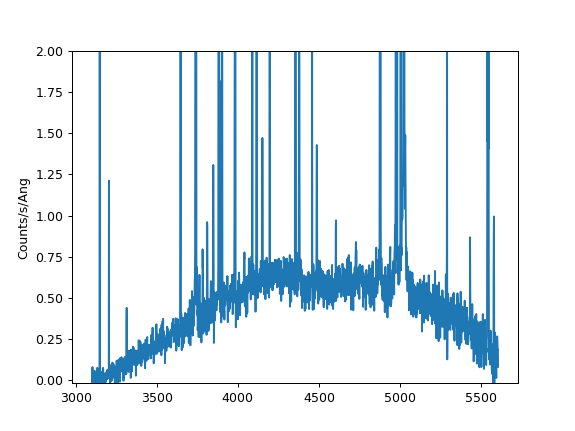

In [57]:
# Plot
plt.clf()
ax = plt.gca()
ax.plot(blue_spec['box_wave'], blue_spec['box_counts']/dwv_b/texp_b)
# Axes
ax.set_ylim(-0.02, 2.)
ax.set_ylabel('Counts/s/Ang')
plt.show()

## Load Red

In [43]:
red_spec_file = path+'lris_red_setup_A/Science/spec1d_J1705p3527_LRISr_2015Sep15T065150.fits'

In [58]:
texp_r = 390. # s

In [44]:
red_spec_hdu = fits.open(red_spec_file)
red_spec_hdu.info()

Filename: /scratch/REDUX/Keck/LRIS/fluxing/J1705/lris_red_setup_A/Science/spec1d_J1705p3527_LRISr_2015Sep15T065150.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       7   ()      
  1  O901-S8745-D01-I0022  BinTableHDU     31   2048R x 11C   [D, D, K, D, D, D, D, D, D, D, D]   
  2  O795-S8745-D01-I0022  BinTableHDU     31   2048R x 11C   [D, D, K, D, D, D, D, D, D, D, D]   
  3  O247-S1443-D02-I0022  BinTableHDU     31   2048R x 11C   [D, D, K, D, D, D, D, D, D, D, D]   


In [45]:
red_spec = Table(red_spec_hdu[3].data)

In [46]:
red_spec[0:5]

obj_trace,box_sky,box_mask,box_wave,box_flam,box_flam_var,box_var,box_counts,opt_var,opt_counts,opt_wave
float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64
72.8133024138,8.97970087478,2,5564.16038454,0.490001570008,0.00790730661849,897.396017686,165.072698435,469.337410075,114.586231791,5564.14792936
72.8130682128,6.70130141556,2,5565.70065409,0.797616069831,0.010012227537,1136.28237191,268.70247979,518.656165249,188.91477332,5565.68782412
72.8128356301,6.08701455295,2,5567.24105575,0.654419598924,0.0111387781719,1264.1340036,220.462169339,457.476575152,147.660554168,5567.22842457
72.8126046654,7.62738041951,2,5568.78158939,0.634646998163,0.0118460078415,1344.39712222,213.801136472,468.590898534,134.159372376,5568.76857627
72.8123753185,20.5409620258,2,5570.3222549,0.110605612094,0.0129409351873,1468.65984367,37.2610374495,485.064941825,14.7290642736,5570.30948332


In [51]:
dwv_r = red_spec['box_wave'] - np.roll(red_spec['box_wave'],1)
dwv_r[0] = dwv_r[1]

<IPython.core.display.Javascript object>


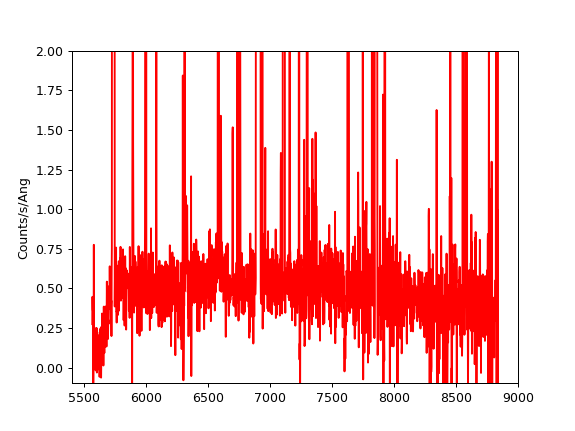

In [61]:
# Plot
plt.clf()
ax = plt.gca()
ax.plot(red_spec['box_wave'], red_spec['box_counts']/dwv_r/texp_r, 'r')
# Axes
ax.set_ylim(-0.1, 2.)
ax.set_ylabel('Counts/s/Ang')
plt.show()

## Appears to be consistent counts/s/Ang between the two sides [Good]

## Plotting flam

<IPython.core.display.Javascript object>


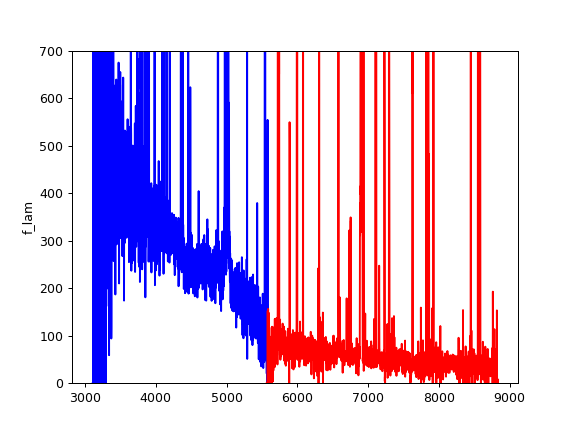

In [68]:
# Plot
plt.clf()
ax = plt.gca()
ax.plot(blue_spec['box_wave'], blue_spec['box_flam'], 'b')
ax.plot(red_spec['box_wave'], red_spec['box_flam'], 'r')
# Axes
ax.set_ylim(-0.1, 700.)
ax.set_ylabel('f_lam')
plt.show()

----

### Checking photometry

In [69]:
g = 18.45 # SDSS

In [72]:
f_nu_g = 10.**(-0.4*(g+48.6)) * u.erg/u.s/u.Hz/u.cm**2
f_nu_g

<Quantity 1.5135612484362072e-27 erg / (cm2 Hz s)>

In [76]:
f_lam_g = f_nu_g * const.c.cgs / (4000*u.AA)**2
f_lam_g.to('erg/s/cm**2/AA')

<Quantity 2.835964043763995e-16 erg / (Angstrom cm2 s)>

In [77]:
200 * 1e-17

2e-15

## Tests and Misc

In [54]:
15 * 40.

600.0